Shape: (25000, 3)


/Users/blaubach/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


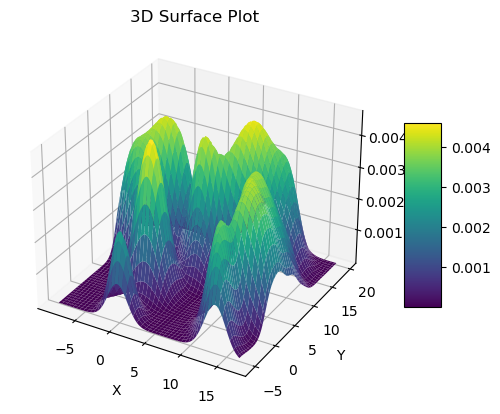

In [19]:

import numpy as np
import umap.umap_ as umap
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import tqdm

def get_data(transformation, sp, start):
    data_list = []
    common_directory = "/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/"
    directories = {
        0: f"0.5gcc_1000K_3B_graphs/0.5gcc_1000K_3B_graphs/0.5gcc_1000k_3b{transformation}/",
        1: f"1.0gcc_2000K_3B_graphs/1.0gcc_2000K_3B_graphs/1.0gcc_2000k_3b{transformation}/",
        2: f"2.0gcc_6000K_3B_graphs/2.0gcc_6000k_3b{transformation}/"
    }
    
    # Set the desired subsample size
    subsample_size = 1000
    
    # Loop over the range of integers from 50 to 74
    for i in range(start, start+25):
        directory = common_directory + directories.get(sp, f"{sp}.0gcc_2000K_3B_graphs/{sp}.0gcc_2000k_3b{transformation}/")
        try:
            # Generate the filename
            if sp != 2:
                filename = f'{directory}00{i}.3b_clu-{transformation.lower()}.txt'
            else:
                filename = f'{directory}0{i}.3b_clu-{transformation.lower()}.txt'
            
            # Read the data from the file
            data = np.loadtxt(filename)
            sort_data = np.sort(data, axis=1)

            # Subsample the sorted data using random indices
            if sp != 0:
                random_indices = np.random.choice(sort_data.shape[0], size=subsample_size, replace=False)
                subsampled_data = sort_data[random_indices, :]
                data_list.append(subsampled_data)  
            else:
                data_list.append(sort_data) 
        except FileNotFoundError:
            print(f"File not found: {filename}")

    # Concatenate the list of arrays along axis 0 (rows)
    concat_data = np.concatenate(data_list, axis=0)
    return concat_data

statepoints = np.array(["R", 0, 50],
                       ["S", 0 , 50],
                       ["R", 1, 75],
                       ["S", 1, 75],
                       ["R", 2, 100],
                       ["S", 2, 100])
concat_data = get_data("S",1, 75)
# Print the shape of concatenated data
print("Shape:", np.shape(concat_data))

# Create a UMAP model with 2 components (dimensions)
umap_model = umap.UMAP(random_state=42,n_components=2)

# Fit the UMAP model to your data and transform it to 2 dimensions
embedding = umap_model.fit_transform(concat_data)

# Calculate KDE
x = embedding[:,0]
y = embedding[:,1]
xy = np.vstack([x,y])

# Create a grid for the surface plot
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
xy_grid = np.vstack([x_grid.ravel(), y_grid.ravel()])
z_grid = gaussian_kde(xy)(xy_grid).reshape(x_grid.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [20]:
def euler_char(A,thresh):
    ECs = []
    A = A - np.identity(np.shape(A)[0])
    
    for t in thresh:

        M = np.array((A <= t)*1)
                
        #Number Edges
        Edges = np.sum(M)/2
        
        #Number Vertices
        Vertices = np.shape(A)[0]
        
        #Betti 1
        EC = Vertices - Edges
        
        ECs.append(EC)
        
    return ECs

Text(0, 0.5, 'Euler Characteristic ($\\chi_{\\ell}$)')

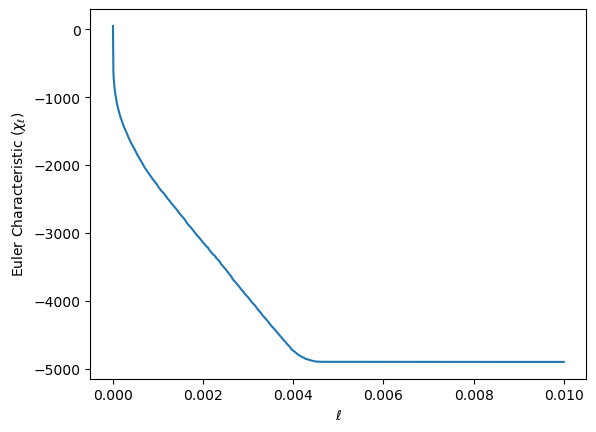

In [22]:
import tqdm

thresh = np.linspace(0,.01,1000)

ECs = []


EC = euler_char(np.absolute(z_grid),thresh)
plt.plot(thresh,EC)
plt.xlabel("$\ell$")
plt.ylabel(r"Euler Characteristic ($\chi_{\ell}$)")

['R' '0' '50']
Shape: (19251, 3)


/Users/blaubach/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


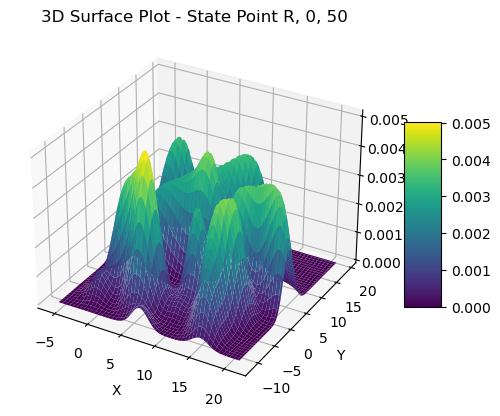

['S' '0' '50']
Shape: (19251, 3)


/Users/blaubach/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


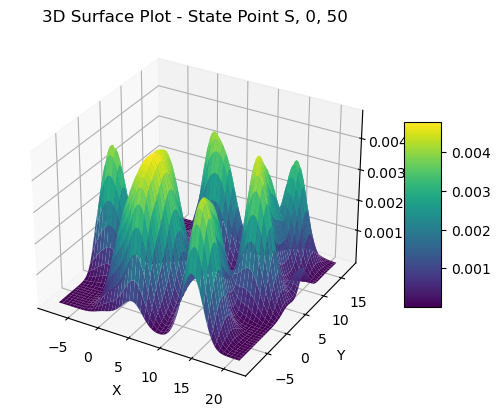

['R' '1' '75']
Shape: (25000, 3)


/Users/blaubach/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


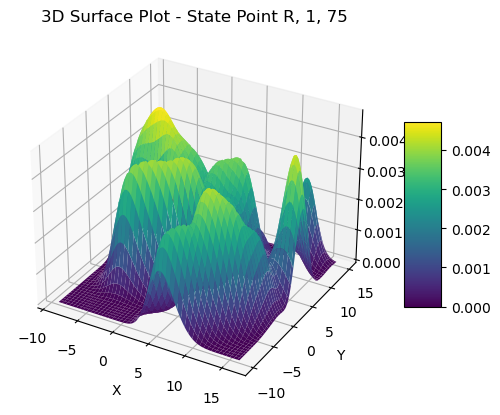

['S' '1' '75']
Shape: (25000, 3)


/Users/blaubach/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


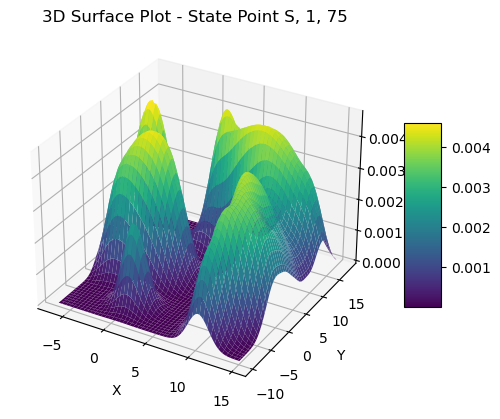

['R' '2' '100']
Shape: (25000, 3)


/Users/blaubach/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


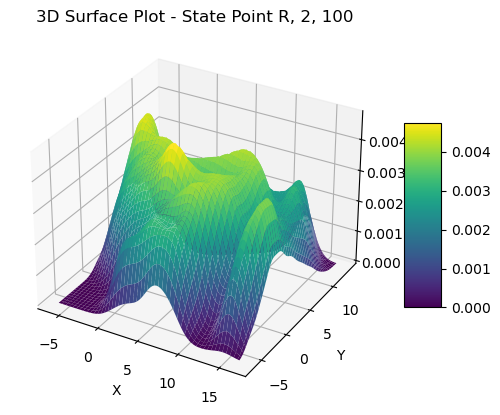

['S' '2' '100']
Shape: (25000, 3)


/Users/blaubach/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


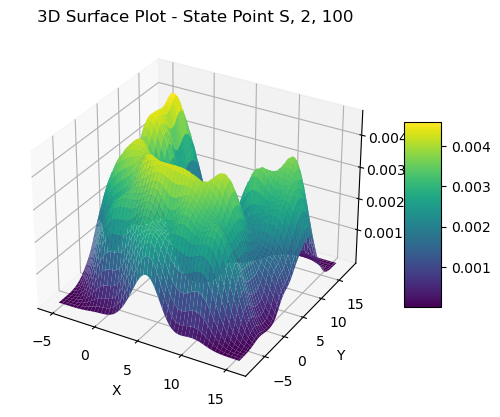

In [28]:
import numpy as np
import umap.umap_ as umap
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def get_data(transformation, sp, start):
    data_list = []
    common_directory = "/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/"
    directories = {
        0: f"0.5gcc_1000K_3B_graphs/0.5gcc_1000K_3B_graphs/0.5gcc_1000k_3b{transformation}/",
        1: f"1.0gcc_2000K_3B_graphs/1.0gcc_2000K_3B_graphs/1.0gcc_2000k_3b{transformation}/",
        2: f"2.0gcc_6000K_3B_graphs/2.0gcc_6000k_3b{transformation}/"
    }
    
    # Set the desired subsample size
    subsample_size = 1000
    
    # Loop over the range of integers from start to start + 25
    for i in range(start, start + 25):
        directory = common_directory + str(directories[sp])
        try:
            # Generate the filename
            if sp != 2:
                filename = f'{directory}00{i}.3b_clu-{transformation.lower()}.txt'
            else:
                filename = f'{directory}0{i}.3b_clu-{transformation.lower()}.txt'
            
            # Read the data from the file
            data = np.loadtxt(filename)
            sort_data = np.sort(data, axis=1)

            # Subsample the sorted data using random indices
            if sp != 0:
                random_indices = np.random.choice(sort_data.shape[0], size=subsample_size, replace=False)
                subsampled_data = sort_data[random_indices, :]
                data_list.append(subsampled_data)  
            else:
                data_list.append(sort_data) 
        except FileNotFoundError:
            print(f"File not found: {filename}")

    # Concatenate the list of arrays along axis 0 (rows)
    concat_data = np.concatenate(data_list, axis=0)
    return concat_data

state_points = np.array([
    ["R", 0, 50],
    ["S", 0, 50],
    ["R", 1, 75],
    ["S", 1, 75],
    ["R", 2, 100],
    ["S", 2, 100]
])

# Create an empty dictionary to store the mappings
statepoint_zgrid_dict = {}

for state_point in state_points:
    print(state_point)
    transformation = state_point[0]
    sp = int(state_point[1])
    start = int(state_point[2])

    concat_data = get_data(transformation, sp, start)
    
    # Print the shape of concatenated data
    print("Shape:", np.shape(concat_data))

    # Create a UMAP model with 2 components (dimensions)
    umap_model = umap.UMAP(random_state=42, n_components=2)

    # Fit the UMAP model to your data and transform it to 2 dimensions
    embedding = umap_model.fit_transform(concat_data)

    # Calculate KDE
    x = embedding[:,0]
    y = embedding[:,1]
    xy = np.vstack([x,y])

    # Create a grid for the surface plot
    x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
    xy_grid = np.vstack([x_grid.ravel(), y_grid.ravel()])
    z_grid = gaussian_kde(xy)(xy_grid).reshape(x_grid.shape)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D Surface Plot - State Point {transformation}, {sp}, {start}')

    # Add a color bar
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
    
    # Add the statepoint as the key and z_grid as the value to the dictionary
    statepoint_key = tuple(state_point)  # Convert to tuple if statepoint is a list
    statepoint_zgrid_dict[statepoint_key] = z_grid


('R', '0', '50')
('S', '0', '50')
('R', '1', '75')
('S', '1', '75')
('R', '2', '100')
('S', '2', '100')


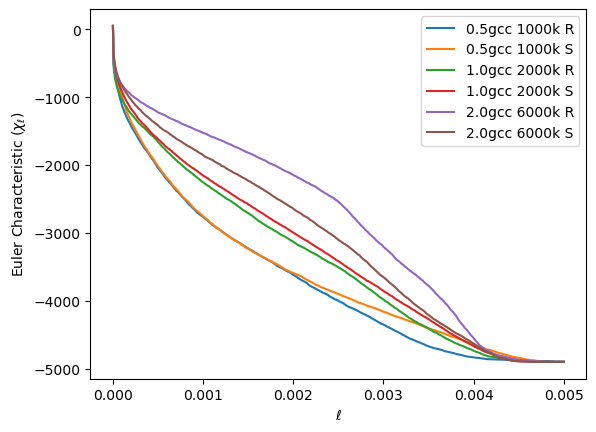

In [37]:
import tqdm

thresh = np.linspace(0,.005,1000)

ECs = []


for key, z in statepoint_zgrid_dict.items():
    print(key)
    trans = key[0]
    if key[1] == '0':
        label = f"0.5gcc 1000k {trans}"
    elif key[1] == '1':
        label = f"1.0gcc 2000k {trans}"
    else:
        label = f"2.0gcc 6000k {trans}"
    EC = euler_char(np.absolute(z),thresh)
    ECs.append(EC)
    plt.plot(thresh,EC, label=label)
plt.xlabel("$\ell$")
plt.ylabel(r"Euler Characteristic ($\chi_{\ell}$)")
plt.legend()

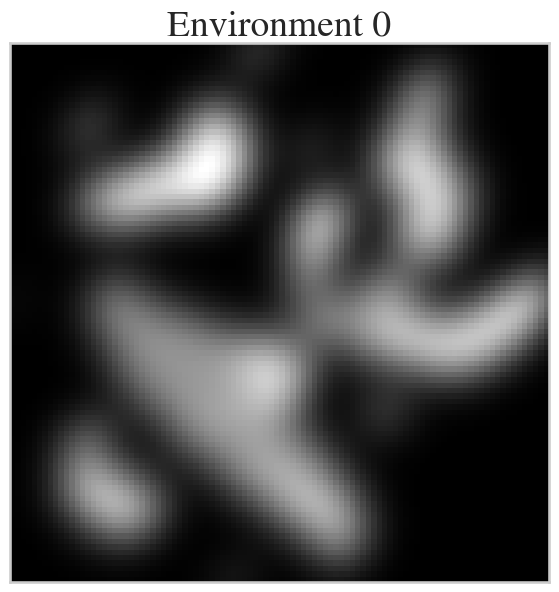

  0%|          | 0/6 [00:00<?, ?it/s]

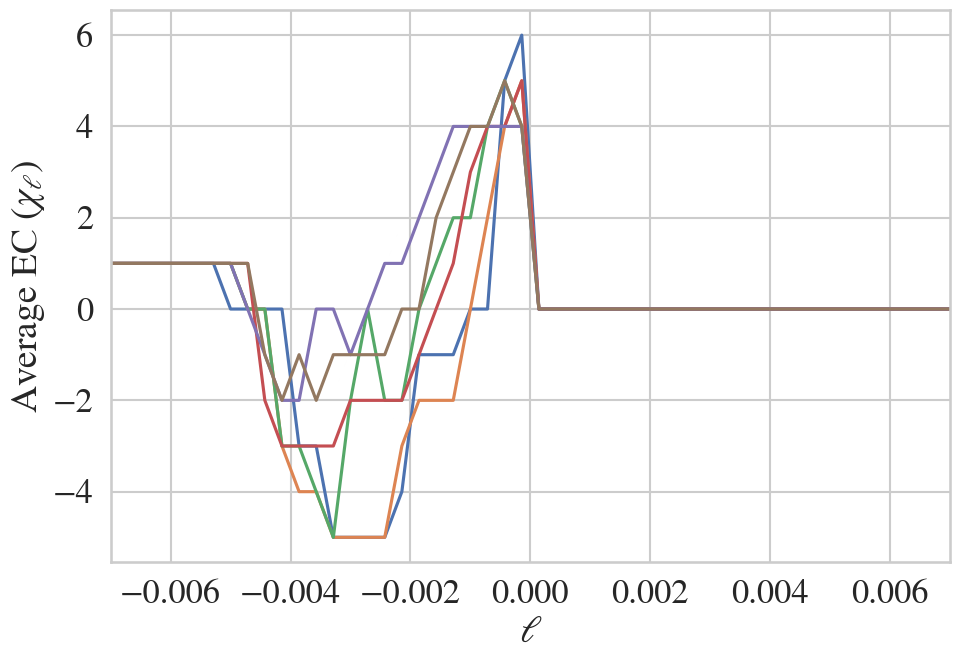

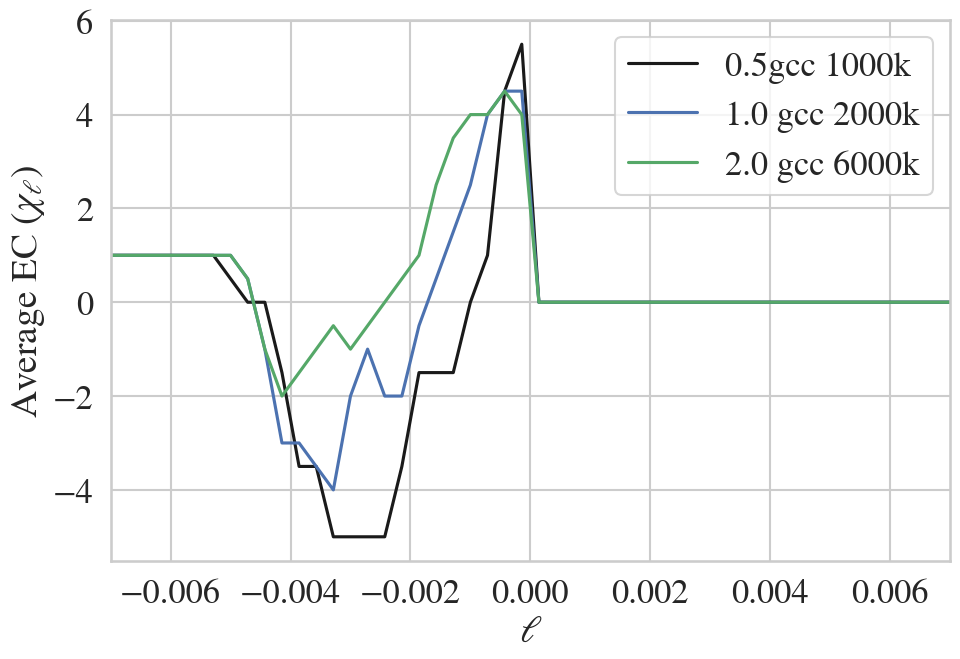

In [90]:
#TDA Methods
import gudhi as gd

#Analysis Tools
import glob
import pickle
import numpy as np
import skimage 
from skimage import color
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter

#Create progress bar
from tqdm.notebook import trange, tqdm

#Formatting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")
sns.set_context("talk", font_scale = 1.5)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['figure.figsize'] = [10, 7]

def getEC(data):
    cubeplex = gd.CubicalComplex(dimensions  = [np.shape(data)[1],np.shape(data)[0]],top_dimensional_cells=np.ndarray.flatten(data));
    cubeplex.persistence();
    b = np.zeros((numPoints,2)) ;
    ec = np.zeros(numPoints);
    for (i,fval) in enumerate(np.flip(filtrations)):
        betti = cubeplex.persistent_betti_numbers(fval,fval);
        b[i] = [betti[0], betti[1]];
        ec[i] = betti[0] - betti[1];
    return ec;

numPoints = 50;
filtrationStart = -0.007;
filtrationEnd = 0.007;
filtrations = np.linspace(filtrationStart,filtrationEnd,numPoints);
    
# Extract all values from the dictionary
values = list(statepoint_zgrid_dict.values())
i=0
plt.figure()
plt.imshow(values[i],cmap = 'gray')
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.title(f"Environment {i}")
plt.show()


ec = []
fft = []
aimages = []

for i in tqdm(range(len(values))):
    aimage = values[i]
    ec.append(getEC(aimage))
    fft.append(np.real(np.fft.fftn(aimage)).flatten())
    aimages.append(aimage.flatten())

for key, z in statepoint_zgrid_dict.items():
    print(key)
    trans = key[0]
    if key[1] == '0':
        label = f"0.5gcc 1000k {trans}"
    elif key[1] == '1':
        label = f"1.0gcc 2000k {trans}"
    else:
        label = f"2.0gcc 6000k {trans}"
    plt.plot(filtrations, ec[i])

plt.xlabel("$\ell$")
plt.ylabel("Average EC ($\chi_{\ell}$)")

plt.xlim(filtrationStart,filtrationEnd)

plt.tight_layout()
plt.show()


ecv = np.vstack(ec)
Mix1EC = np.mean(ecv[0:2],axis = 0)
Mix2EC = np.mean(ecv[2:4],axis = 0)
Mix3EC = np.mean(ecv[4:6],axis = 0)
plt.plot(filtrations,Mix1EC, 'k', label = "0.5gcc 1000k")
plt.plot(filtrations,Mix2EC, 'b', label = "1.0 gcc 2000k")
plt.plot(filtrations,Mix3EC, 'g', label = "2.0 gcc 6000k")

plt.legend()

plt.xlabel("$\ell$")
plt.ylabel("Average EC ($\chi_{\ell}$)")

plt.xlim(filtrationStart,filtrationEnd)

plt.tight_layout()
plt.savefig("avgEC_LC.svg")

In [61]:
np.shape(ec[0])

(1000,)